**Import libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Load and inspect data**

In [2]:
df = pd.read_csv("recipe_site_traffic_2212.csv")

In [3]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [4]:
df.isna().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [5]:
for i in df.columns:
    print(df[i].dtypes)

int64
float64
float64
float64
float64
object
object
object


Data Validation

In [6]:
df['recipe'].duplicated().sum()

0

In [7]:
df["high_traffic"].value_counts()

high_traffic
High    574
Name: count, dtype: int64

In [8]:
df["category"].value_counts()

category
Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: count, dtype: int64

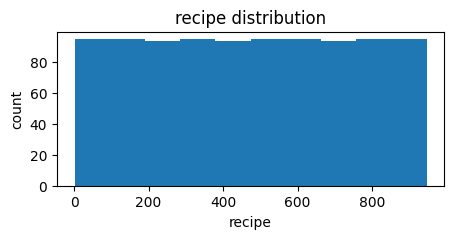

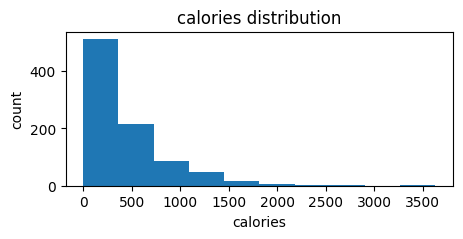

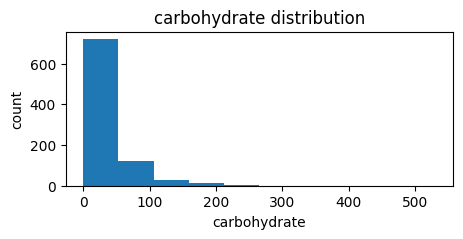

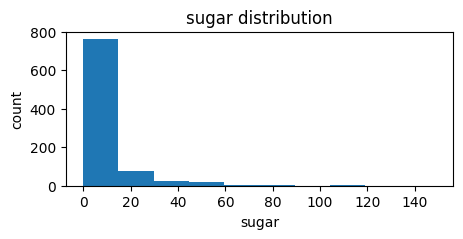

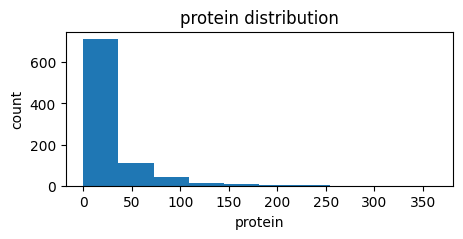

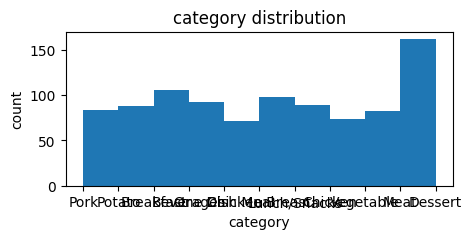

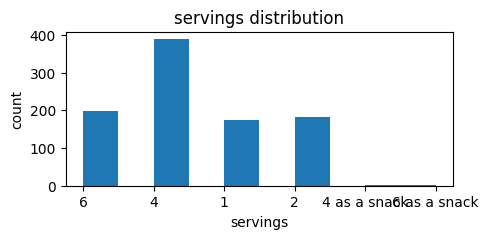

In [9]:
for i in df.columns.drop("high_traffic"):
    plt.figure(figsize=(5, 2))
    plt.hist(df[i])
    plt.xlabel(i)
    plt.ylabel("count")
    plt.title(i+" distribution")
    plt.show()

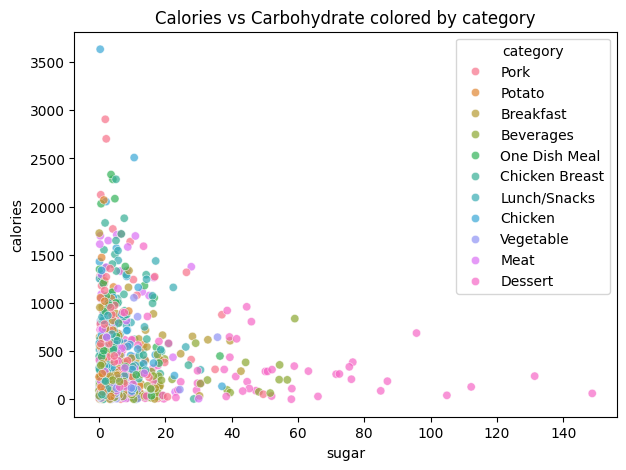

In [10]:

plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=df,
    x="sugar",
    y="calories",
    hue="category",
    alpha=0.7
)
plt.title("Calories vs Carbohydrate colored by category")
plt.show()

In [11]:
df["servings"].value_counts()

servings
4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: count, dtype: int64

In [12]:
#Impute
#for right-skewed columns, impute NAs with median

num_cols = ["calories", "carbohydrate", "sugar", "protein"]

imputer = SimpleImputer(strategy="median")
df[num_cols] = imputer.fit_transform(df[num_cols])

#for high_traffic, impute NAs with Low
df["high_traffic"] = df["high_traffic"].fillna("Low")

In [13]:
df.isna().sum()

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

In [14]:
df["servings"] = df["servings"].astype(str).str.extract(r"(\d+)").astype(int)

In [15]:
df["servings"].value_counts()

servings
4    391
6    198
2    183
1    175
Name: count, dtype: int64

In [16]:
df["category"] = df["category"].replace({"Chicken Breast": "Chicken"})

In [17]:
for i in df.columns:
    print(df[i].dtypes)

int64
float64
float64
float64
float64
object
int32
object


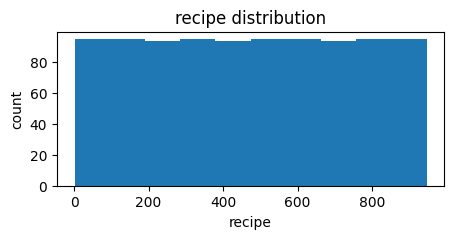

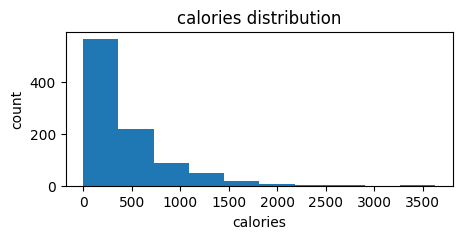

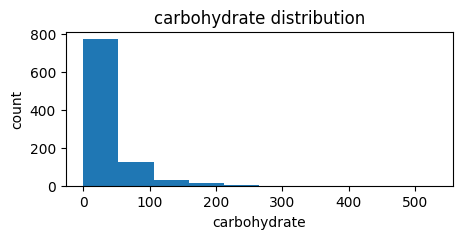

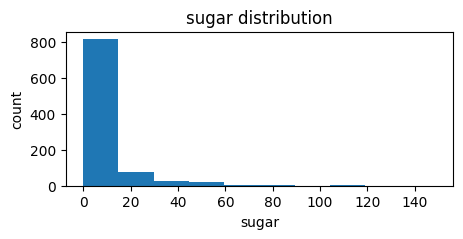

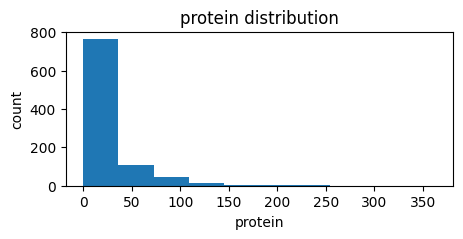

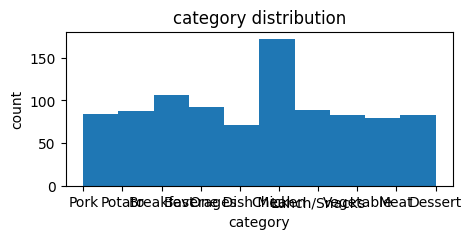

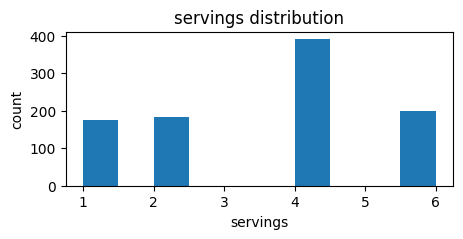

In [18]:
for i in df.columns.drop("high_traffic"):
    plt.figure(figsize=(5, 2))
    plt.hist(df[i])
    plt.xlabel(i)
    plt.ylabel("count")
    plt.title(i+" distribution")
    plt.show()

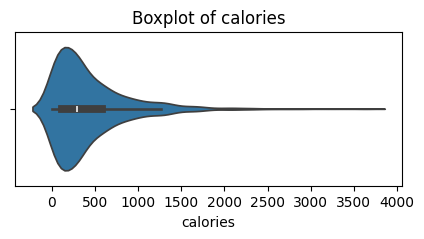

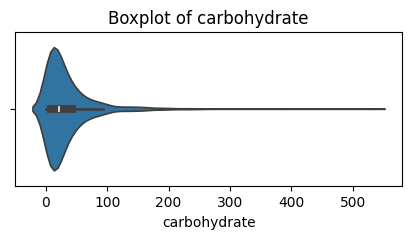

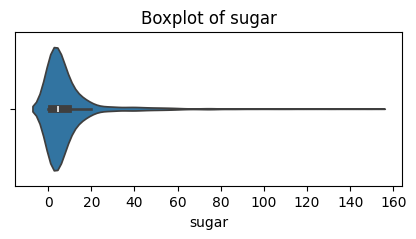

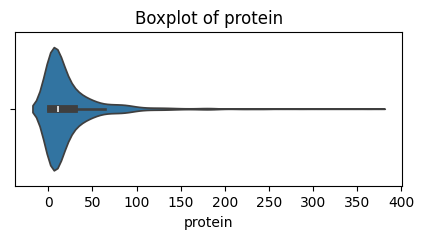

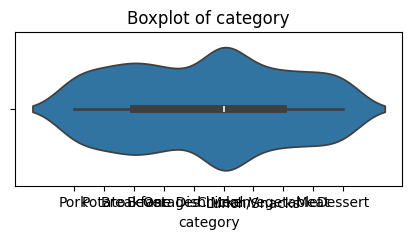

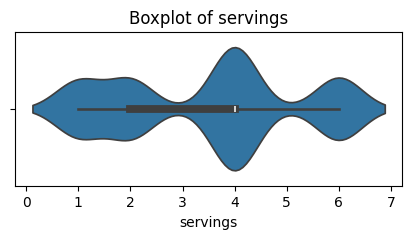

In [19]:
for i in df.columns.drop(["high_traffic","recipe"]):
    plt.figure(figsize=(5,2))
    sns.violinplot(x=df[i])
    plt.title("Boxplot of " + i)
    plt.show()

In [20]:

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

encoded_cat = encoder.fit_transform(df[["category"]])

# 转回 DataFrame
encoded_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(["category"]))

# 合并回数据
df_encoded = pd.concat([df.drop(columns=["category"]), encoded_df], axis=1)

df_encoded["high_traffic"] = df_encoded["high_traffic"].map({"High": 1, "Low": 0})
X = df_encoded.drop(columns=["high_traffic", "recipe"])
y = df_encoded["high_traffic"]


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [22]:

logit = LogisticRegression(max_iter=50000)
logit.fit(X_train, y_train)

y_pred = logit.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.79      0.73        75
           1       0.85      0.77      0.80       115

    accuracy                           0.77       190
   macro avg       0.77      0.78      0.77       190
weighted avg       0.78      0.77      0.78       190


Confusion Matrix:
 [[59 16]
 [27 88]]


In [23]:

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight='balanced', 
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7315789473684211
              precision    recall  f1-score   support

           0       0.64      0.72      0.68        75
           1       0.80      0.74      0.77       115

    accuracy                           0.73       190
   macro avg       0.72      0.73      0.72       190
weighted avg       0.74      0.73      0.73       190

[[54 21]
 [30 85]]


In [24]:



logit = LogisticRegression(max_iter=50000)
logit.fit(X_train, y_train)


y_proba = logit.predict_proba(X_test)[:, 1]


threshold = 0.43
y_pred_new = (y_proba >= threshold).astype(int)


print("Threshold:", threshold)
print("Accuracy:", accuracy_score(y_test, y_pred_new))
print("\nClassification Report:\n", classification_report(y_test, y_pred_new))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_new))


Threshold: 0.43
Accuracy: 0.7684210526315789

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71        75
           1       0.81      0.80      0.81       115

    accuracy                           0.77       190
   macro avg       0.76      0.76      0.76       190
weighted avg       0.77      0.77      0.77       190


Confusion Matrix:
 [[54 21]
 [23 92]]
